<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW12_zGermain/lab11_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as pl
import numpy as np
np.random.seed(123)

# 1 Getting the data: standard handwritten digit recognition task

In [0]:
(train_input, train_labels), (test_input, test_labels) = keras.datasets.mnist.load_data()

# 2 understand the input data

# task 1: print the shape of the train input and train labels

# task 2: print the label of the 10th observation

# task 3: what is the shape of train_input 1?

# task 4: plot train_inpu 1


In [4]:
print("Train Inputs Shape: {}".format(train_input.shape))
print("Train Labels Shape: {}".format(train_labels.shape))

Train Inputs Shape: (60000, 28, 28)
Train Labels Shape: (60000,)


In [5]:
train_labels[9]

4

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
train_input[0].shape

(28, 28)

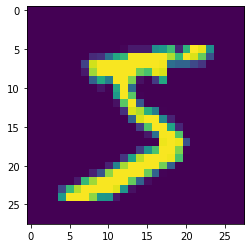

In [8]:
pl.imshow(train_input[0]);

# 3 Create the model

# task 5: create a model with 3 layers: input layer and 2 fully connected layers with 128 and 10 neurons respectively

In [9]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid), 
                          keras.layers.Dense(10, activation=tf.nn.softmax) ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# 4 set the hyperparameters
# task 6: set a learning rate of 0.01, a loss function "sparse_categorical_crossentropy" and set the metric to "accuracy
                                              

In [0]:
model.compile(optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01), loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6692 - acc: 0.8312
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3580 - acc: 0.9047
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3019 - acc: 0.9176
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2714 - acc: 0.9252
Epoch 5/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2508 - acc: 0.9306


# Task 7: test the model

In [12]:
test_loss, test_acc = model.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.2373 - acc: 0.9335


# task 8 plot the 10'th test observation and its label and prediction

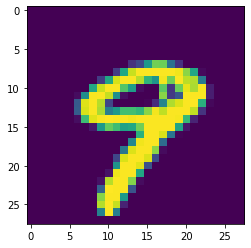

In [13]:
pl.imshow(test_input[9]);

In [14]:
pred = model.predict(test_input)
pred10 = pred[9]
print("The label is: {}".format(test_labels[9]))
print("The prediction is: {}".format(np.argmax(pred10) + 1))

The label is: 9
The prediction is: 10


# task 9: find the first wrong prediction in the test set

In [15]:
wrong = False
i = 0
while(wrong):
  if ( test_labels[i] != (np.argmax(pred[i]) + 1) ):
    wrong = True

print("The first wrong prediction occurs for the {}th position".format(i+1))

The first wrong prediction occurs for the 1th position


task 10: create a more complex model by adding 3 fully connected layers (you choose the size). Retrain and test the accuracy of prediction and discuss if the model is overfitting

In [17]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid), 
                          keras.layers.Dense(10, activation=tf.nn.softmax),
                          keras.layers.Dense(7, activation=tf.nn.sigmoid),
                          keras.layers.Dense(77, activation=tf.nn.sigmoid),
                          keras.layers.Dense(777, activation=tf.nn.softmax)])
model.compile(optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01), loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 2.6633 - acc: 0.1073
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 2.3176 - acc: 0.1085
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 2.3103 - acc: 0.1092
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 2.3074 - acc: 0.1100
Epoch 5/5
60000/60000 [==============================] - 6s 97us/sample - loss: 2.3057 - acc: 0.1116


In [18]:
pred = model.predict(test_input)
numRight = 0;
numTot = test_input.shape[0]
for i in range(0, numTot - 1):
  if (test_labels[i] == (np.argmax(pred[i]) + 1)):
    numRight+=1

print("Accuracy on the test sample: {}%". format(numRight/numTot))

Accuracy on the test sample: 0.1032%


In [22]:
pred = model.predict(train_input)
numRight = 0;
numTot = train_input.shape[0]
for i in range(0, numTot - 1):
  if (train_labels[i] == (np.argmax(pred[i]) + 1)):
    numRight+=1

print("Accuracy on the training sample: {}%". format(numRight/numTot))

Accuracy on the training sample: 0.0993%


The model is not overfitting, the accuracy of the test and training sets are both very low, this is not a very good model.